<a href="https://colab.research.google.com/github/BasiraS/data_analytics_2/blob/main/Python/Unit%204%20-%20Machine%20Learning%20and%20Modeling%20Techniques/Unit4_L4_ML_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Name: Basira Shirzad

# Date: 01-18-2021

#KNN algorithm

1. Pick a value for K.
2. Search for the K observations in the training data that are "nearest" to the measurements of the unknown iris.
3. Use the most popular response value from the K nearest neighbors as the   predicted response value for the unknown value.
hOW KNN works?
How we will classify an unknown fruit classifyes as a specific fruit?
We will compare its characteristic with 



# KNN classifier

Suppose we’ve been given a classified data set from a company! They’ve hidden the feature column names but have given you the data and the target classes. We’ll try to use KNN to create a model that directly predicts a class for a new data point based off of the features. Let’s grab it and use it.

### Machine learning terminology
- Each row is an **observation** (also known as: sample, example, instance, record) we will designate it with  y
- Each column is a **feature** (also known as: predictor, attribute, independent variable, input, regressor, covariate) we will designate it as an X, capital X (designating matrix)

# Import Libraries

In [411]:
# Standard Libraries for visualization and data wrangling 
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

# Logistic Regression Models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import  KNeighborsClassifier
from sklearn.metrics import  classification_report, confusion_matrix
%matplotlib inline

Read the data set or load it if it is encapsulated in SIlearn 
df = pd.read_csv('https...') or
import load_iris function from datasets module
scikit-learn comes with a few small standard datasets that do not require to download any file from some external website.some of them are:
  >load_boston() - Load and return the boston house-prices dataset (regression).

  > load_iris() - Load and return the iris dataset (classification).

  > load_diabetes() - Load and return the diabetes dataset (regression).

Example of 21 Pandas operations on data files 

https://towardsdatascience.com/21-pandas-operations-for-absolute-beginners-5653e54f4cda

# Get the Data

In [412]:
# Import pandas library to perform manipulation and analysis on the data
import pandas as pd

In [413]:
# Import the Company data set into a pandas dataframe
df = pd.read_csv('https://raw.githubusercontent.com/CunyLaguardiaDataAnalytics/datasets/master/Classified%20Data')

In [414]:
# Check the head of the dataframe to get a clear idea of all the columns in the dataframe
df.head()

,Unnamed: 0,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [415]:
# List of Columns in the dataframe
df.columns

Index(['Unnamed: 0', 'WTT', 'PTI', 'EQW', 'SBI', 'LQE', 'QWG', 'FDJ', 'PJF',
       'HQE', 'NXJ', 'TARGET CLASS'],
      dtype='object')

* We noticed that the column 'Unnamed: 0' is empty, so we will drop it from the dataframe.

In [416]:
# Drop "Unnamed: 0" column, not needed
df.drop(['Unnamed: 0'], axis=1, inplace=True)  

* When inplace = False , which is the default, then the operation is performed and it returns a copy of the object. You then need to save it to something. So, instead we did inplace = True , so the data is modified in place, which means it will return nothing and the dataframe is now updated.

In [417]:
# Check the head of the dataframe to see if column was removed
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [418]:
# Check if df is a dataframe
type(df)

pandas.core.frame.DataFrame

In [419]:
# Store the dataframe, df to a new variable 
ad_data = df

In [420]:
# View the dataframe to see if it is the same as the df dataframe
print (ad_data) 

          WTT       PTI       EQW  ...       HQE       NXJ  TARGET CLASS
0    0.913917  1.162073  0.567946  ...  0.879422  1.231409             1
1    0.635632  1.003722  0.535342  ...  0.621552  1.492702             0
2    0.721360  1.201493  0.921990  ...  0.957877  1.285597             0
3    1.234204  1.386726  0.653046  ...  1.522692  1.153093             1
4    1.279491  0.949750  0.627280  ...  1.463812  1.419167             1
..        ...       ...       ...  ...       ...       ...           ...
995  1.010953  1.034006  0.853116  ...  1.117340  1.348517             1
996  0.575529  0.955786  0.941835  ...  0.958684  1.663489             0
997  1.135470  0.982462  0.781905  ...  0.919191  1.385504             1
998  1.084894  0.861769  0.407158  ...  1.277456  1.188063             1
999  0.837460  0.961184  0.417006  ...  1.257190  1.364837             1

[1000 rows x 11 columns]


#Standardization and Normalization of data

https://benalexkeen.com/feature-scaling-with-scikit-learn/

 Since the range of values of raw data varies widely, in some machine learning algorithms, objective functions do not work correctly without normalization or standardization. 

There are 4 types of scaling in sicikit

 StandardScaler, MinMaxScaler, RobustScaler, Normalizer
Two most common used is Normalization (help to scale your features 0 to 1 ) and (standarization , Standardizing a dataset involves rescaling the distribution of values so that the mean of observed values is 0 and the standard deviation is 1) 

we are standardizing the data now   


 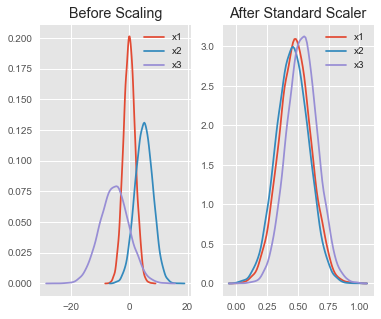


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

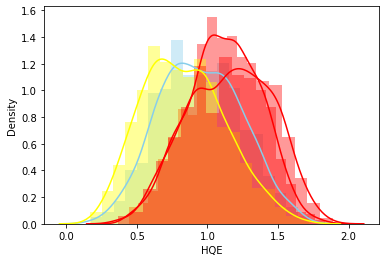

In [421]:
# View if the data has a wide range of values and if it needs to be standarize
sns.distplot( ad_data["WTT"] , color="skyblue")
sns.distplot( ad_data["PTI"] , color="red")
sns.distplot( ad_data["EQW"] , color="yellow")
sns.distplot( ad_data["HQE"] , color="red")

Ploting few of the data features we see how the data in not standard. StandardScaler basically helps to normalise the data within a particular range (to be around mean=0,std=1) by subtracting the mean from every value and then scaling to unit variance, which is dividing all the values by the standard deviation. Sometimes, it also helps in speeding up the calculations in an algorithm.



In [422]:
# Import from the sklearn library the StandardScaler to standarize the data
from sklearn.preprocessing import StandardScaler

In [423]:
# Define scaler with the StandardScaler() function
scalar = StandardScaler()

#fit() calculates the parameters (𝜇,std,var) when StandardScaler used
scalar.fit(df.drop('TARGET CLASS', axis=1))

# Transform data
scaled_features = scalar.transform(df.drop('TARGET CLASS', axis=1))

In [424]:
# Apply dataframe on all columns of scaled data
df_feature = pd.DataFrame(scaled_features, columns=df.columns[:-1])

In [425]:
# Check the head of the dataframe to see the scaled values now
df_feature.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

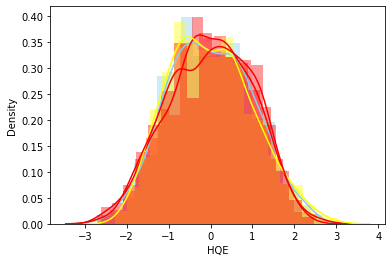

In [426]:
# View the data after scaling 
sns.distplot( df_feature["WTT"] , color="skyblue")
sns.distplot( df_feature["PTI"] , color="red")
sns.distplot( df_feature["EQW"] , color="yellow")
sns.distplot( df_feature["HQE"] , color="red")

* You can see after standarizing the data, the data no longer has a wide range and has a more small scale. This step in standarizing all of our values is important and necessary in order to have an effective and accurate model.

## scikit-learn 4-step modeling pattern


Train and Test your model:

Import the library

With sklearn.model_selection.train_test_split you are creating 4 portions of data which will be used for fitting & predicting values.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4,random_state=42) 

X_train, X_test, y_train, y_test

1. X_train - This includes your all independent variables,these will be used to train the model, also as we have specified the test_size = 0.4, this means 60% of observations from your complete data will be used to train/fit the model and rest 40% will be used to test the model.

2. X_test - This is remaining 40% portion of the independent variables from the data which will not be used in the training phase and will be used to make predictions to test the accuracy of the model.

3. y_train - This is your dependent variable which needs to be predicted by this model, this includes category labels against your independent variables, we need to specify our dependent variable while training/fitting the model.

4. y_test - This data has category labels for your test data, these labels will be used to test the accuracy between actual and predicted categories.

Now you can fit a model on this data, let's fit sklearn.linear_model.LogisticRegression

# KNN Model

# Test Train Split

In [427]:
# Import from the sklearn library the train_test_split
from sklearn.model_selection import train_test_split

In [428]:
# Split the data frame so you have a portion of data to train the model and then later test the model
# 30% of the data will be tested and 70% of the data will be trained
X_train, X_test, y_train, y_test  = train_test_split(scaled_features, df['TARGET CLASS'], test_size =0.3)

In [429]:
# View the X_train, X_test, y_train, y_test 
print ("X_train: ", X_train)
print ("X_test: ", X_test)
print ("y_train: ", y_train)
print ("y_test: ", y_test)

X_train:  [[ 1.09871611  0.10821966  1.70471772 ... -1.99665574  0.765287
  -1.2869013 ]
 [-0.52722275  0.78909985  0.99715272 ... -1.07606557 -1.76040812
   1.69680239]
 [-0.1246426  -1.70291869  0.40808843 ... -1.5545462   1.34418762
   0.74956471]
 ...
 [ 1.17567308 -0.73544471 -1.57394433 ...  0.64571622  0.99896804
  -0.40195545]
 [-1.07451797 -0.41839071 -0.10786446 ... -1.18897998  1.4634693
  -1.26211948]
 [-0.21282108 -1.38910208  2.03740763 ...  0.30687445 -2.13731669
   0.98643939]]
X_test:  [[ 0.63481859  0.43925597 -0.63463349 ...  0.55339821  0.26730671
  -0.13177793]
 [ 0.6890948   1.79007846 -0.22520343 ...  0.50901094 -1.0221759
   1.19510593]
 [-0.17485632  0.4076143  -0.91516466 ... -0.51249961  0.92743846
   1.4232916 ]
 ...
 [-1.03169551 -0.67896574  0.5227607  ...  1.46570974 -0.60770763
   1.21597801]
 [-0.89727859  2.2467565   1.62749679 ... -0.53374082  0.16806351
   0.11378461]
 [ 0.13794139 -0.80847575 -0.91589819 ... -2.23635744 -0.57993863
   0.86629486]]
y

Name of the object does not matter.

Can specify tuning parameters (aka "hyperparameters") during this step.

All parameters not specified are set to their defaults.

# Training and Predicting

In [430]:
# Import from the sklearn library the KNeighborsClassifier to build the model
from sklearn.neighbors import KNeighborsClassifier

In [431]:
# Lets start with a K value of K = 1
knn = KNeighborsClassifier(n_neighbors=1)

In [432]:
# Build the KNeighborsClassifier Model
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [433]:
# Store the prediction result of the KNeighborsClassifier Model
predict = knn.predict(X_test)

In [434]:
# View the values of the prediction made by the model
predict 

array([1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1])

# Confusion Matrix

In [435]:
# Import from the sklearn library the confusion matrix to view the performance of the model
from sklearn.metrics import confusion_matrix

In [436]:
# A Confusion matrix is an N x N matrix used for evaluating the performance of a classification model, 
# where N is the number of target classes. The matrix compares the actual target values with those predicted
print(confusion_matrix(y_test,predict))

[[132  16]
 [ 11 141]]


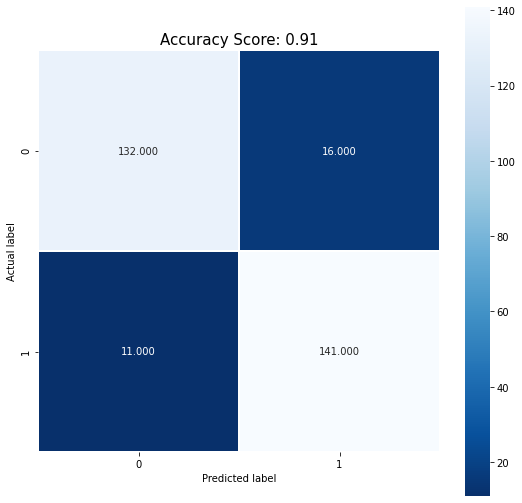

In [437]:
# View the confusion matrix of the KNeighborsClassifier Model
plt.figure(figsize=(9,9))
sns.heatmap(confusion_matrix(y_test, predict), annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(knn.score(X_test, y_test))
plt.title(all_sample_title, size = 15);

# Classification Report

Precision is the ability of a classifier not to label an instance positive that is actually negative. What percent of your predictions were correct?

Recall — What percent of the positive cases did you catch?

F1 score — What percent of positive predictions were correct? 

The F1 score is a weighted harmonic mean of precision and recall such that the best score is 1.0 and the worst is 0.0. Recall is the ability of a classifier to find all positive instances. Let say your models predicts apples and bananas. If your model avoids making many mistakes (predicting bananas as Apples) we say the model has high precision. Like wise, if your Model avoids making many mistakes predicting apple as bananas, than your model has a high recall. 

You want your model to aim high both for recall and precision and avoids as many mistakes as possible. But what if your model is good in predicting in one class and bad at other (Let say good precision and bad recall? Wouldn’t be misleading to look at precision or recall separately? 

This is where F1 comes in, it takes in to account both precision and recall, balance of the two is where F1 scores on. If your model does a good job predicting Apples and bananas, your Model has high F1 score. However, there are cases where you want to focus on precision or vice versa for example, class A might be aggressive kind of cancer and class B might be no cancer. The stakes of misleading cancer as no cancer or overlooking the cancer are extremely high therefore you want your model to avoid mistaking for cancer as no cancer or mistaking A for B, this means you want to focus on recall. You don’t want your model to miss the cancer, you want your model to say I got the cancer, maybe I was to cautious and is taken few no cancer patient for cancer patient, but this is preferred than having cancer and saying sorry i missed it.

In [438]:
# Import from the sklearn library the classification report to view the evaluation of the model
from sklearn.metrics import  classification_report

In [439]:
# Check the evaluation of the KNeighborsClassifier Model
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       0.92      0.89      0.91       148
           1       0.90      0.93      0.91       152

    accuracy                           0.91       300
   macro avg       0.91      0.91      0.91       300
weighted avg       0.91      0.91      0.91       300



In [440]:
# The sklearn metrics module implements several loss, score, and utility functions to measure classification performance
# Calculating the acuracy score (y_test vs y_predect)
from sklearn import metrics
first_trial = []
first_trial.append(metrics.accuracy_score(y_test,predict))
print(first_trial)

[0.91]


# Repeat above steps for K = 5, see what happens with Accuracy



###Training and Predicting

In [441]:
# Import from the sklearn library the KNeighborsClassifier to build the model
from sklearn.neighbors import KNeighborsClassifier

# Lets start with a K value of K = 5
knn = KNeighborsClassifier(n_neighbors=5)

# Build the KNeighborsClassifier Model
knn.fit(X_train,y_train)

# Store the prediction result of the KNeighborsClassifier Model
predict = knn.predict(X_test)

# View the values of the prediction made by the model
predict 

array([1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1])

### Confusion Matrix

[[127  21]
 [  4 148]]


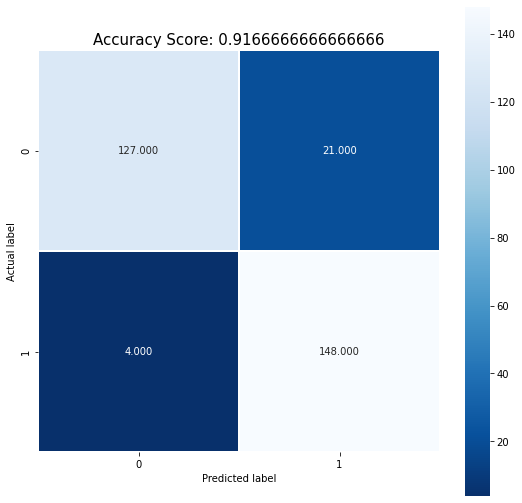

In [442]:
# Import from the sklearn library the confusion matrix to view the performance of the model
from sklearn.metrics import confusion_matrix

# A Confusion matrix is an N x N matrix used for evaluating the performance of a classification model, 
# where N is the number of target classes. The matrix compares the actual target values with those predicted
print(confusion_matrix(y_test,predict))

# View the confusion matrix of the KNeighborsClassifier Model
plt.figure(figsize=(9,9))
sns.heatmap(confusion_matrix(y_test, predict), annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(knn.score(X_test, y_test))
plt.title(all_sample_title, size = 15);

### Classification Report

In [443]:
# Import from the sklearn library the classification report to view the evaluation of the model
from sklearn.metrics import  classification_report

# Check the evaluation of the KNeighborsClassifier Model
print(classification_report(y_test,predict))

# The sklearn metrics module implements several loss, score, and utility functions to measure classification performance
# Calculating the acuracy score (y_test vs y_predect)
from sklearn import metrics
first_trial = []
first_trial.append(metrics.accuracy_score(y_test,predict))
print(first_trial)

              precision    recall  f1-score   support

           0       0.97      0.86      0.91       148
           1       0.88      0.97      0.92       152

    accuracy                           0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300

[0.9166666666666666]


# K Value and Accuracy
Selecting the optimal K value to achieve the maximum accuracy of the model 
Initialize a random K value and start computing.
Derive a plot between error rate and K denoting values in a defined range. Then choose the K value as having a minimum error rate.


In [444]:
# Import numpy library to work with arrays and matrices
import numpy as np

Now it’s time to improve the model and find out the optimal k value.


In [445]:
# Import sklearn metrics module to implement several loss, score, and utility functions to measure classification performance
from sklearn import metrics

In [446]:
# Create an array called score to keep track of the accuracy score
score =[]

In [447]:
# Run for k from 1 to 39
# Passing the value of K to KNeighborsClassifier and calculating the acuracy score (y_test vs y_predect)
for i in range(1,40):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train, y_train)
  y_pred = knn.predict(X_test)
  score.append(metrics.accuracy_score(y_test,y_pred))

print(score)

[0.91, 0.9233333333333333, 0.92, 0.9233333333333333, 0.9166666666666666, 0.9366666666666666, 0.9266666666666666, 0.9366666666666666, 0.93, 0.9333333333333333, 0.9366666666666666, 0.9433333333333334, 0.9366666666666666, 0.9466666666666667, 0.9433333333333334, 0.9466666666666667, 0.9433333333333334, 0.95, 0.9466666666666667, 0.9566666666666667, 0.95, 0.9466666666666667, 0.9466666666666667, 0.9433333333333334, 0.9433333333333334, 0.9466666666666667, 0.94, 0.95, 0.9466666666666667, 0.9466666666666667, 0.9366666666666666, 0.9433333333333334, 0.9366666666666666, 0.9433333333333334, 0.94, 0.95, 0.9433333333333334, 0.9466666666666667, 0.94]


Text(0, 0.5, 'Testing Accuracy')

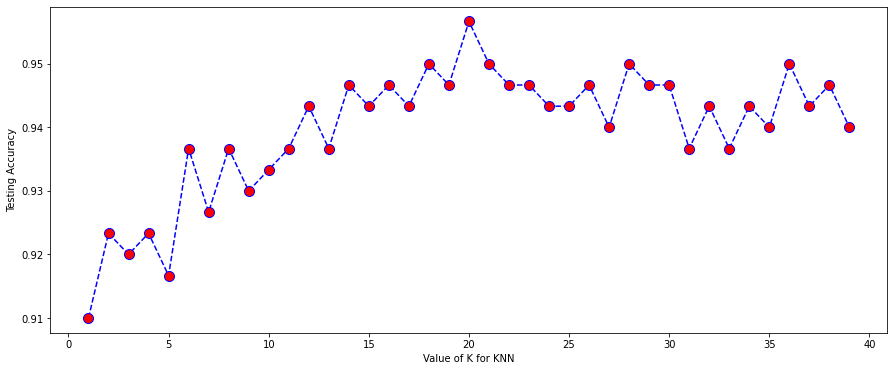

In [448]:
# View the accuracy to see the performance of each K value
plt.figure(figsize=(15,6))
plt.plot(range(1,40),score, color='blue',linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')


* Viewing the figure, it seems to show that the higher the k value, the higher the precision. However, there are a few points where a high k value is not as high as the previous high k value. 

#Error Rate and K value

In [449]:
# Create an array called error_rate to keep track of the error
error_rate = []

In [450]:
# Run for k from 1 to 39
# Passing the value of K to KNeighborsClassifier and calculating the error rate (y_test vs y_predect)
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Minimum error:- 0.043333333333333335 at K = 19
Maximum error:- 0.09 at K = 0


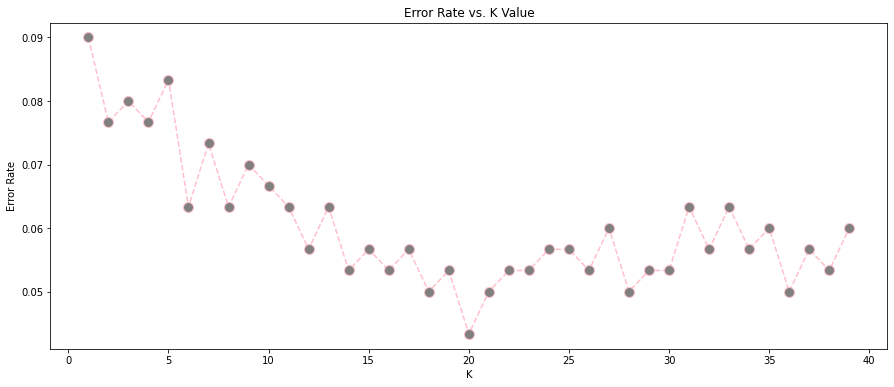

In [451]:
# View the error rate to see the performance of each K value
plt.figure(figsize=(15,6))
plt.plot(range(1,40),error_rate,color='pink', linestyle='dashed', marker='o',
         markerfacecolor='gray', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate)))
print("Maximum error:-",max(error_rate),"at K =",error_rate.index(max(error_rate)))
#print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate)))

* Viewing the figure, it shows that when k is 20, it has the lowest error rate and the highest accuracy, which making it a perfect value for the model. 

# Repeat above steps for K = 20

###Training and Predicting 

In [455]:
# Import from the sklearn library the KNeighborsClassifier to build the model
from sklearn.neighbors import KNeighborsClassifier

# Lets start with a K value of K = 20
knn = KNeighborsClassifier(n_neighbors=20)

# Build the KNeighborsClassifier Model
knn.fit(X_train,y_train)

# Store the prediction result of the KNeighborsClassifier Model
predict = knn.predict(X_test)

# View the values of the prediction made by the model
predict 

array([1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1])

###Confusion Matrix

[[139   9]
 [  4 148]]


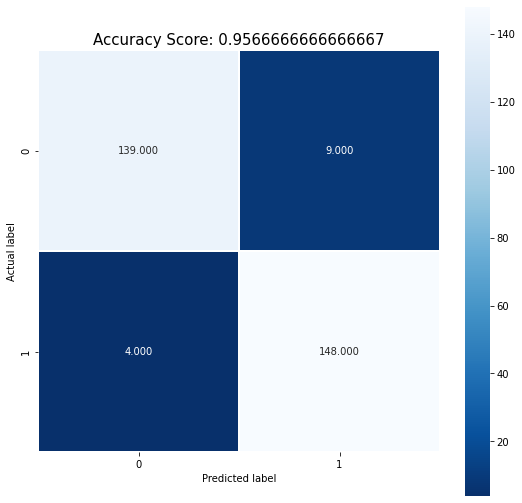

In [456]:
# Import from the sklearn library the confusion matrix to view the performance of the model
from sklearn.metrics import confusion_matrix

# A Confusion matrix is an N x N matrix used for evaluating the performance of a classification model, 
# where N is the number of target classes. The matrix compares the actual target values with those predicted
print(confusion_matrix(y_test,predict))

# View the confusion matrix of the KNeighborsClassifier Model
plt.figure(figsize=(9,9))
sns.heatmap(confusion_matrix(y_test, predict), annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(knn.score(X_test, y_test))
plt.title(all_sample_title, size = 15);

###Classification Report

In [457]:
# Import from the sklearn library the classification report to view the evaluation of the model
from sklearn.metrics import  classification_report

# Check the evaluation of the KNeighborsClassifier Model
print(classification_report(y_test,predict))

# The sklearn metrics module implements several loss, score, and utility functions to measure classification performance
# Calculating the acuracy score (y_test vs y_predect)
from sklearn import metrics
first_trial = []
first_trial.append(metrics.accuracy_score(y_test,predict))
print(first_trial)

              precision    recall  f1-score   support

           0       0.97      0.94      0.96       148
           1       0.94      0.97      0.96       152

    accuracy                           0.96       300
   macro avg       0.96      0.96      0.96       300
weighted avg       0.96      0.96      0.96       300

[0.9566666666666667]


# Findings

When k = 1, the model had a...
  > Accuracy: 91%

  > Precision: 92%

  > Recall: 89%

  > F1: 91%

When k = 5, the model had a...
  > Accuracy: 92%

  > Precision: 97%

  > Recall: 96%

  > F1: 91%

When k = 27, the model had a...
  > Accuracy: 96%

  > Precision: 97%

  > Recall: 94%

  > F1: 96%

The higher the k value the higher the accuracy and error rate, however, at some point there is one high k value that is not the highest value but has the highest accuracy and error rate and that value is 20.



# Conclusion 

Overall, to have an efficient KNN model, it is important that all values are standarized and to find the right k value for the model, one that has a high accuracy and low error rate. For this model, 20 was the right k value. It has a precision of 97% in predicting true positive over total predicted positive, recall of 94% in predicting true positive over total actual positive, and F1 of 96% which is the balance between Precision and Recall. 